In [229]:
import pandas as pd
import numpy as np
import itertools
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt

In [84]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['matrix', 'split']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [91]:
df = pd.read_excel("/content/TargetData (1).xlsx")

In [92]:
df.shape

(99, 5)

In [94]:
df.head()

,Date,id,text,label,target
0,2021-04-13,NaN,ইনিই হচ্ছেন ভারতের প্রতিরক্ষামন্ত্রী মনোহর পা...,Geopolitical,1
1,2020-01-04,NaN,রেন্ডিয়াকে পৃথীবির মানচিএ থেকে মুচে ফেলতে হবে,Geopolitical,1
2,2019-12-15,NaN,এই মালাউনরা বাংগালিদের সাফল্য দেখে হিংসা করে ব...,Religious,2
3,2019-12-04,NaN,আমরা বলতে কারা ভারত তাইতো,Geopolitical,1
4,2022-05-31,NaN,পাকিস্তান আমার বাল,Geopolitical,1


In [95]:
y = df.label

In [96]:
df = df.drop('label', axis=1)

In [97]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], y, test_size=0.33, random_state=53)

In [98]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

In [99]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

In [100]:
tfidf_vectorizer.get_feature_names()[-10:]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['হস', 'হয়', 'হয়ত', 'হয়ন', 'ৎদ', 'ড়ম', 'য়ণত', 'য়ত', 'য়দ', 'য়ন']

In [101]:
count_vectorizer.get_feature_names()[:10]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['অঞ', 'অত', 'অতয', 'অথচ', 'অথব', 'অদ', 'অধ', 'অন', 'অব', 'অবশ']

In [102]:
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [103]:
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [104]:
difference = set(count_df.columns) - set(tfidf_df.columns)
difference

set()

In [105]:
print(count_df.equals(tfidf_df))

False


In [106]:
count_df.head()

,অঞ,অত,অতয,অথচ,অথব,অদ,অধ,অন,অব,অবশ,...,হস,হয়,হয়ত,হয়ন,ৎদ,ড়ম,য়ণত,য়ত,য়দ,য়ন
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,1,0,2,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0


In [107]:
tfidf_df.head()

,অঞ,অত,অতয,অথচ,অথব,অদ,অধ,অন,অব,অবশ,...,হস,হয়,হয়ত,হয়ন,ৎদ,ড়ম,য়ণত,য়ত,য়দ,য়ন
0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.147122,0.0,0.0,0.0,0.0,0.147122,0.0,0.212538,0.0,0.000000,...,0.1339,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.113741,0.0,0.000000,...,0.0000,0.089548,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.199040,0.0,0.250791,...,0.0000,0.156704,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [108]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [109]:
clf = MultinomialNB() 

accuracy:   0.727
Confusion matrix, without normalization


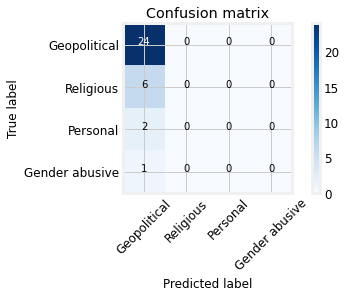

In [110]:
clf.fit(tfidf_train, y_train)
pred = clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Geopolitical', 'Religious','Personal','Gender abusive'])
plot_confusion_matrix(cm, classes=['Geopolitical', 'Religious','Personal','Gender abusive'])

In [111]:
clf = MultinomialNB() 

accuracy:   0.667
Confusion matrix, without normalization


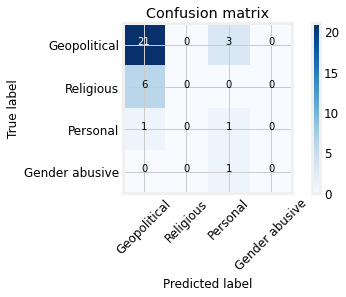

In [112]:
clf.fit(count_train, y_train)
pred = clf.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Geopolitical', 'Religious','Personal','Gender abusive'])
plot_confusion_matrix(cm, classes=['Geopolitical', 'Religious','Personal','Gender abusive'])

In [116]:
linear_clf = PassiveAggressiveClassifier()

accuracy:   0.606
Confusion matrix, without normalization


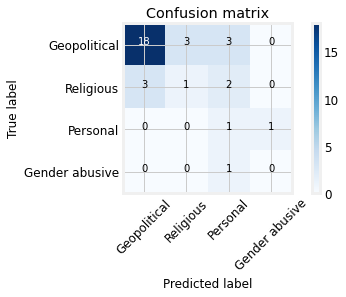

In [117]:
linear_clf.fit(tfidf_train, y_train)
pred = linear_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Geopolitical', 'Religious','Personal','Gender abusive'])
plot_confusion_matrix(cm, classes=['Geopolitical', 'Religious','Personal','Gender abusive'])

In [118]:
clf = MultinomialNB(alpha=0.1)

In [119]:
last_score = 0
for alpha in np.arange(0,1,.1):
    nb_classifier = MultinomialNB(alpha=alpha)
    nb_classifier.fit(tfidf_train, y_train)
    pred = nb_classifier.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred)
    if score > last_score:
        clf = nb_classifier
    print("Alpha: {:.2f} Score: {:.5f}".format(alpha, score))

Alpha: 0.00 Score: 0.72727
Alpha: 0.10 Score: 0.66667
Alpha: 0.20 Score: 0.72727
Alpha: 0.30 Score: 0.69697
Alpha: 0.40 Score: 0.69697
Alpha: 0.50 Score: 0.72727
Alpha: 0.60 Score: 0.72727
Alpha: 0.70 Score: 0.72727
Alpha: 0.80 Score: 0.72727
Alpha: 0.90 Score: 0.72727


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


In [120]:
def most_informative_feature_for_binary_classification(vectorizer, classifier, n=100):
    """
    See: https://stackoverflow.com/a/26980472
    
    Identify most important features if given a vectorizer and binary classifier. Set n to the number
    of weighted features you would like to show. (Note: current implementation merely prints and does not 
    return top classes.)
    """

    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)

    print()

    for coef, feat in reversed(topn_class2):
        print(class_labels[1], coef, feat)


most_informative_feature_for_binary_classification(tfidf_vectorizer, linear_clf, n=30)

Gender abusive -1.8105425859857422 রত
Gender abusive -1.1000300509107261 কয়ট
Gender abusive -1.1000300509107261 জর
Gender abusive -1.039764994170541 মন
Gender abusive -0.9648328234665235 আন
Gender abusive -0.9637461692207849 আর
Gender abusive -0.8922338309002625 উক
Gender abusive -0.8922338309002625 কব
Gender abusive -0.8922338309002625 বব
Gender abusive -0.8922338309002625 মরব
Gender abusive -0.8922338309002625 সপ
Gender abusive -0.8747805204482251 উপয
Gender abusive -0.8519257312135236 বছর
Gender abusive -0.8495164741229337 আওয়
Gender abusive -0.8108144848700921 নক
Gender abusive -0.8042181113931918 কর
Gender abusive -0.7997573892118995 ওয়
Gender abusive -0.7840269987297477 ফর
Gender abusive -0.7840269987297477 লড
Gender abusive -0.7182442657660703 বল
Gender abusive -0.7059504941130377 আপন
Gender abusive -0.6878864489294748 আব
Gender abusive -0.6862331267402784 গর
Gender abusive -0.6728148390606024 লত
Gender abusive -0.6655637019482892 ওর
Gender abusive -0.6524119951815703 সত
Gender 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [121]:
feature_names = tfidf_vectorizer.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [122]:
### Most real
sorted(zip(clf.coef_[0], feature_names), reverse=True)[:20]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


[(-4.870711676890991, 'নক'),
 (-5.11810469743781, 'সব'),
 (-5.1271231880298, 'সট'),
 (-5.273648960179999, 'বই'),
 (-5.297885683016672, 'জন'),
 (-5.315957902236499, 'সমস'),
 (-5.321006365255244, 'একট'),
 (-5.351600639867857, 'যগ'),
 (-5.36398192597757, 'এই'),
 (-5.369975524692017, 'কল'),
 (-5.379124979948552, 'হয়'),
 (-5.388781059477659, 'নত'),
 (-5.396293035864363, 'এক'),
 (-5.43669952675145, 'উজ'),
 (-5.518722683855519, 'এমন'),
 (-5.545399955866646, 'রট'),
 (-5.564768885595653, 'কম'),
 (-5.564768885595653, 'ইল'),
 (-5.584035699327307, 'কর'),
 (-5.6075884998932475, 'ধভ')]

In [123]:
### Most fake
sorted(zip(clf.coef_[0], feature_names))[:20]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


[(-5.865319099268031, 'অঞ'),
 (-5.865319099268031, 'অত'),
 (-5.865319099268031, 'অতয'),
 (-5.865319099268031, 'অথব'),
 (-5.865319099268031, 'অদ'),
 (-5.865319099268031, 'অধ'),
 (-5.865319099268031, 'অন'),
 (-5.865319099268031, 'অবশ'),
 (-5.865319099268031, 'অবস'),
 (-5.865319099268031, 'অভ'),
 (-5.865319099268031, 'অভদ'),
 (-5.865319099268031, 'অর'),
 (-5.865319099268031, 'অল'),
 (-5.865319099268031, 'অস'),
 (-5.865319099268031, 'আউট'),
 (-5.865319099268031, 'আওয়'),
 (-5.865319099268031, 'আগ'),
 (-5.865319099268031, 'আছ'),
 (-5.865319099268031, 'আজ'),
 (-5.865319099268031, 'আজই')]

In [124]:
tokens_with_weights = sorted(list(zip(feature_names, clf.coef_[0])))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


In [198]:
pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [199]:
from sklearn.feature_extraction.text import HashingVectorizer

In [208]:
Sample_text = ["Jon is playing football.","He loves to play football.","He is just 10 years old.", "His favorite player is Cristiano Ronaldo."]
print(Sample_text)

['Jon is playing football.', 'He loves to play football.', 'He is just 10 years old.', 'His favorite player is Cristiano Ronaldo.']


In [209]:
My_vect = HashingVectorizer(n_features=2**4)

In [210]:
Fit_text = vectorizer.fit_transform(Sample_text)

In [211]:
print(Fit_text, '\n')
print(Fit_text.shape)

  (0, 3)	0.48693426407352264
  (0, 10)	0.6176143709756019
  (0, 4)	0.6176143709756019
  (1, 8)	0.6176143709756019
  (1, 6)	0.6176143709756019
  (1, 3)	0.48693426407352264
  (2, 7)	0.5
  (2, 12)	0.5
  (2, 0)	0.5
  (2, 5)	0.5
  (3, 11)	0.5
  (3, 1)	0.5
  (3, 9)	0.5
  (3, 2)	0.5 

(4, 13)


In [193]:
clf = MultinomialNB(alpha=.01)

In [214]:

clf.fit(Fit_text,y_train)
pred = clf.predict(hash_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Geopolitical', 'Religious','Personal','Gender abusive'])
plot_confusion_matrix(cm, classes=['Geopolitical', 'Religious','Personal','Gender abusive'])

ValueError: ignored

In [233]:
hash_vectorizer = HashingVectorizer()
hash_train = hash_vectorizer.fit_transform(X_train)
hash_test = hash_vectorizer.transform(X_test)

In [234]:
linear_clf = PassiveAggressiveClassifier()

accuracy:   0.606
Confusion matrix, without normalization


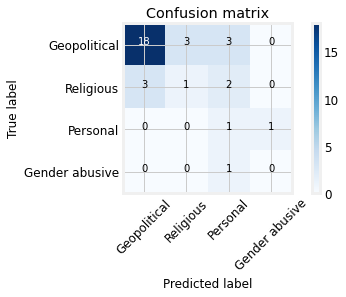

In [235]:

linear_clf.fit(hash_train,y_train)
pred = linear_clf.predict(hash_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Geopolitical', 'Religious','Personal','Gender abusive'])
plot_confusion_matrix(cm, classes=['Geopolitical', 'Religious','Personal','Gender abusive'])

In [228]:

from sklearn.decomposition import NMF
from sklearn.preprocessing import MinMaxScaler
vectorizer = TfidfVectorizer(max_df=0.5, stop_words='english', use_idf=True)
lsa = NMF(n_components=100)
mnb = MultinomialNB(alpha=0.01)

train_text = vectorizer.fit_transform(X_train)
train_text = lsa.fit_transform(train_text)
train_text = MinMaxScaler(copy=False).fit_transform(X_train)

mnb.fit(X_train, X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


ValueError: ignored